Here we are predicting whether a patient is diabetic or not using support vector machine classification algorithm.
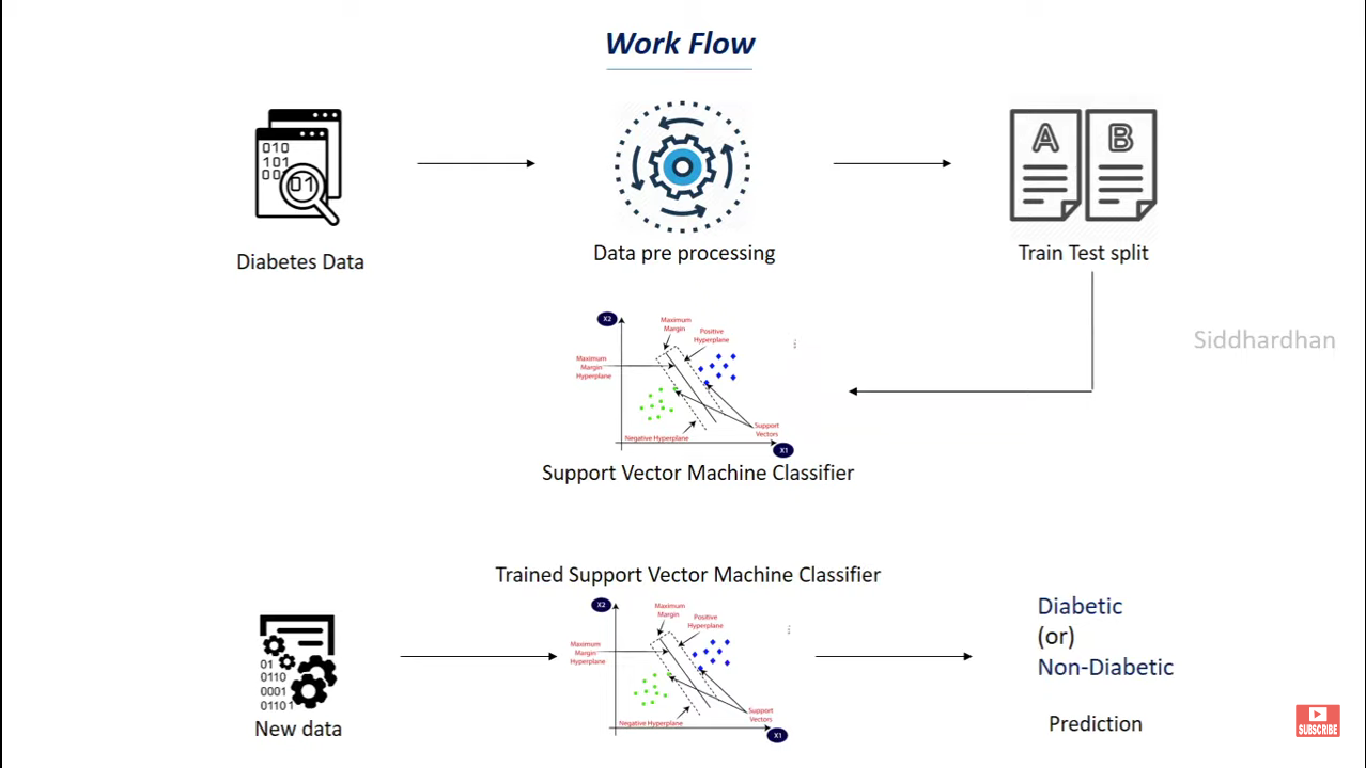

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

### Data Collection and Analysis
#### PIMA Diabetes Dataset

In [2]:
pd.read_csv?

In [3]:
dataset = pd.read_csv('diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
dataset.shape

(768, 9)

In [7]:
#statistical info of dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non Diabetic

1--> Diabetic

Here the number of data entry with label 0 and 1 should be close to equal for better prediction, right now we are working with small dataset so its fine if there is some inequality in numbers of data entry but while working with big data we must consider this......

In [9]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
#separating data and labels
X = dataset.drop(columns='Outcome', axis=1)
Y = dataset['Outcome']

In [11]:
print(X, Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Data Standardization

In [12]:
scaler = StandardScaler()
#fit calcualtes mean and std deviation for set and transform applies those calculated values to specified set
Z = scaler.fit(X)
standardised_data = scaler.transform(X)
#fit and transform can be done in a line code using fit_transform function of StandardScaler
X = standardised_data

In [13]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
#stratify is used to tell algo not to split data such that all the 1 or 0 goes to train or test set.
#random_state is used to specify order of spliting of data, is somebody else uses same number as i he would get similar results.

In [15]:
 print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

In [16]:
classifier = svm.SVC(kernel='linear')


In [17]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
y_hat = classifier.predict(X_test)

In [19]:
accuracy_of_model = accuracy_score(y_hat, Y_test)
accuracy_of_model

0.7727272727272727

### Making a Prediction System

In [20]:
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)
input_data_np_array = np.asarray(input_data)
input_data_reshaped = input_data_np_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)

if prediction[0]==1:
    print("Patient is Diabetic")
else:
    print("Patient is not Diabetic")
prediction[0]

Patient is Diabetic


1

In [21]:
import pickle

In [23]:
filename = "DiabetesPredictionModel.sav"
pickle.dump(classifier, open(filename, 'wb'))

In [24]:
diabetesModel = pickle.load(open("DiabetesPredictionModel.sav", 'rb'))

In [26]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = diabetesModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
